# 4. Feature Scaling

- 특정 feature 의 value 가 다른 feature 들 보다 훨씬 크면, 그 값이 목적함수를 지배하게 되므로 정확한 학습이 되지 않음

- sklearn 의 preprocessing module 은 scale, minmax_scale 함수와 이에 대응하는 StandardScaler, MinMaxScaler class 및 fit(), transform() method 를 제공하여 쉽게 scaling 을 할 수 있도록 지원

## 1) Simple Feature Scaling

$$ X_{new} = \frac{X_{old}}{X_{max}}$$

## 2) Min-Max Scaling

- 최대/최소값이 1, 0 이 되도록 scaling  
- x=min 이면 y=0, x=max 이면 y=1.


$$ X_{new} = \frac{X_{old} - X_{min}}{X_{max} - X_{min}}$$


## 3) Standard Scaling (Z-score)

- 평균과 표준편차를 이용하여 scaling  
- $\mu : 평균, \sigma : 표준편차 $

$$ X_{new} = \frac{X_{old} - \mu}{\sigma}$$


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [2]:
X = np.arange(-3, 6).astype('float32').reshape(-1, 1)
X = np.vstack([X, [20]])               # outlier 추가

In [3]:
X_simple = X/X.max()
X_simple

array([[-0.15],
       [-0.1 ],
       [-0.05],
       [ 0.  ],
       [ 0.05],
       [ 0.1 ],
       [ 0.15],
       [ 0.2 ],
       [ 0.25],
       [ 1.  ]])

In [4]:
#MinMaxScale
scaler = MinMaxScaler()
X_minmax = scaler.fit_transform(X)
X_minmax

array([[0.        ],
       [0.04347826],
       [0.08695652],
       [0.13043478],
       [0.17391304],
       [0.2173913 ],
       [0.26086957],
       [0.30434783],
       [0.34782609],
       [1.        ]])

In [5]:
#Standard Scaler
scaler = StandardScaler()
X_standard = scaler.fit_transform(X)
X_standard

array([[-0.95099461],
       [-0.78980908],
       [-0.62862356],
       [-0.46743803],
       [-0.3062525 ],
       [-0.14506697],
       [ 0.01611855],
       [ 0.17730408],
       [ 0.33848961],
       [ 2.75627252]])

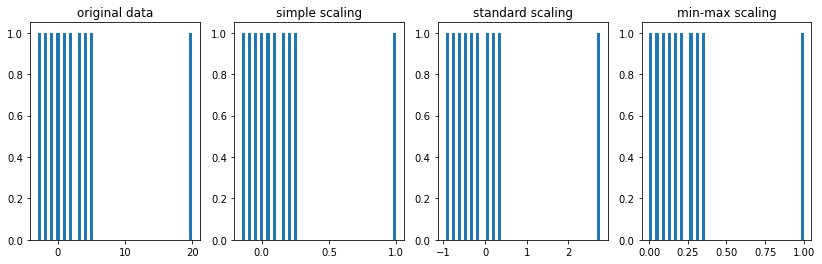

In [6]:
plt.figure(figsize=(14,4))
plt.subplot(1,4,1)
plt.hist(X, bins=50);
plt.title('original data')

plt.subplot(1,4,2)
plt.hist(X_simple, bins=50);
plt.title('simple scaling')

plt.subplot(1,4,3)
plt.hist(X_standard, bins=50);
plt.title('standard scaling')

plt.subplot(1,4,4)
plt.hist(X_minmax, bins=50);
plt.title('min-max scaling');